# Project Title

## Nick Buller, Kerry Harp, Sofanit Mengesha, Christopher Pope

### Narrative, Hypothesis, Intro, etc.
World Happiness Report (https://worldhappiness.report/)

Social Progress Index (https://www.socialprogress.org/)

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json

In [2]:
#file path
#Import clean csv file
project_df_path = "Data/merge.csv"
project_df = pd.read_csv(project_df_path)
project_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,...,90.3,3.195,3.428,2.764,1.2,0.79,42.4,3.5186,0.8919,4.2892
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,...,87.6,3.544,3.750,3.318,4.3,0.88,29.8,4.5731,0.9135,4.1745
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,...,88.5,3.384,3.396,3.363,3.3,0.90,31.4,4.1070,0.9434,4.0184
3,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,...,88.5,3.113,2.772,2.746,4.2,0.90,62.2,3.2448,0.9065,4.1465
4,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,...,88.7,2.958,3.449,2.866,3.3,0.79,49.0,5.1351,0.9103,2.8077


In [3]:
#suppress warning
import warnings
warnings.simplefilter("ignore")

Over the 5 years that were analyzed (2015-2019), the Happiness Score had up to 156 countries participating and the Social Progress Index had up to 192. After data from both was merged and cleaned up, 76 cities make up the participation in both the Happiness Score and the Social Progress Index.

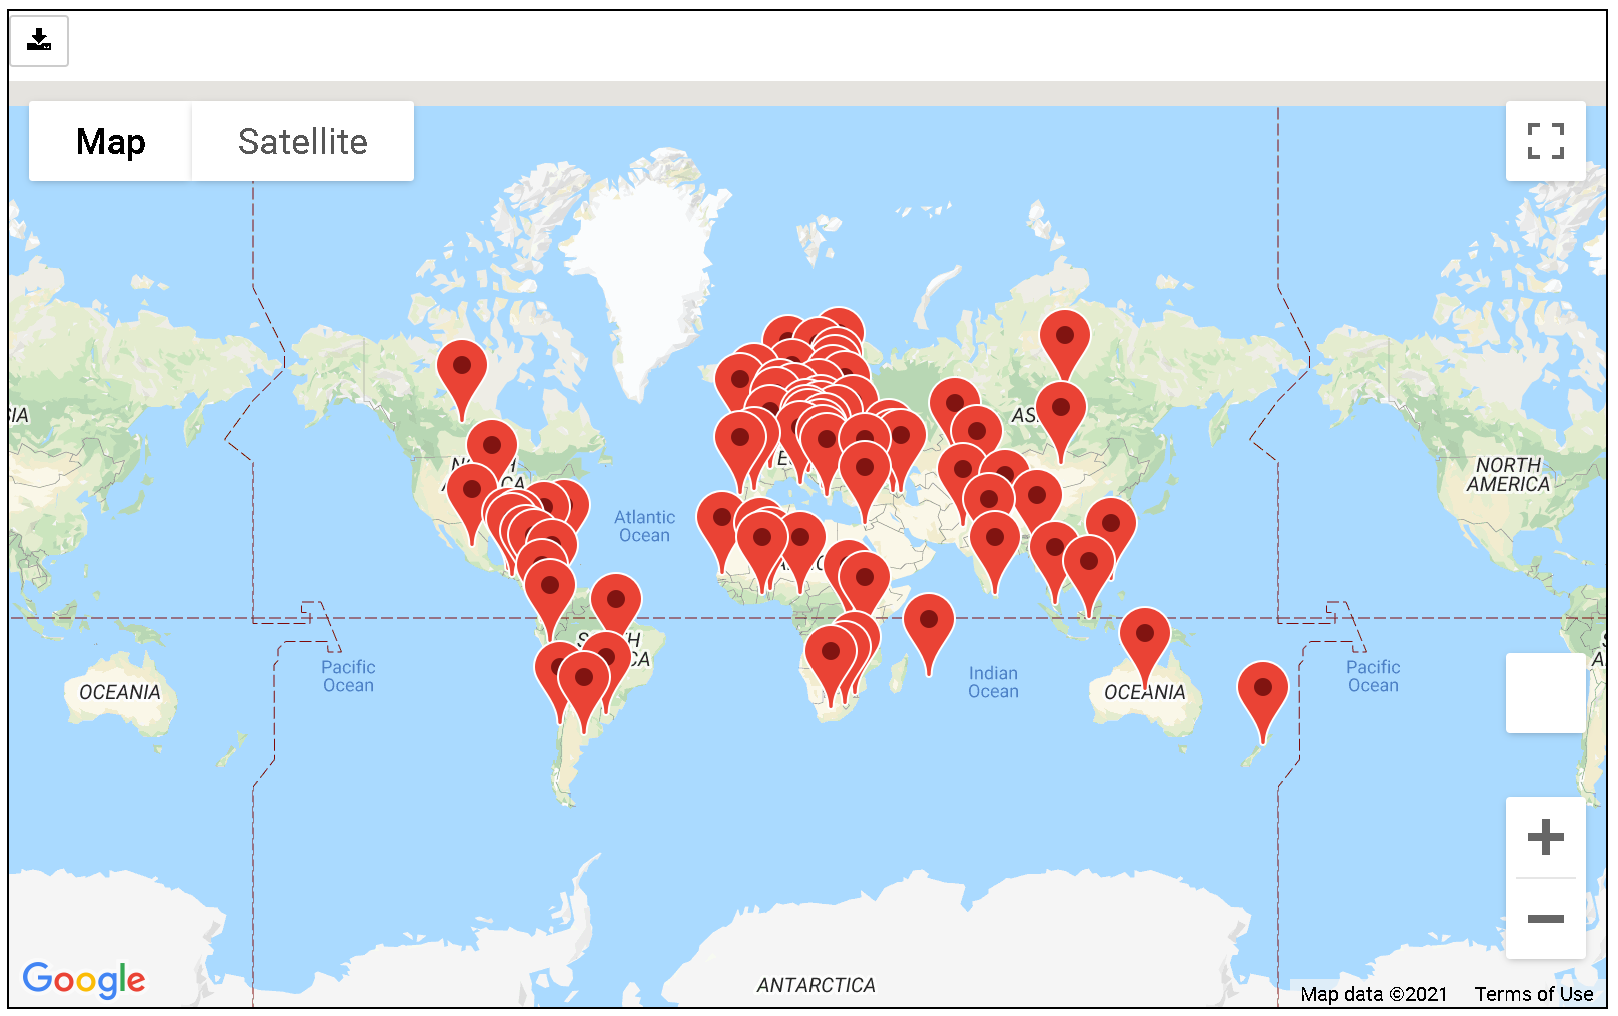

# The Social Progress Index Score and Happiness Score have a positive correlation

In [4]:
#Export CSV for participating countries
map_locations = project_df["Country or region_HS"].unique()
#map_locations

In [5]:
#Get ranking and totals data
totals_df = project_df[['Year_HS', 'Country_SP', 'Overall rank_HS', 'Score_HS', 'SPI Rank_SP',  'Social Progress Index_SP']]

#Rename year and country columns
totals_df.rename(columns = {"Year_HS":"Year", "Country_SP":"Country"}, inplace = True)

#configure SPI ranking to not have a decimal
totals_df["SPI Rank_SP"] = totals_df["SPI Rank_SP"].astype(int)

#renaming columns to get rid of spaces
totals_df.rename(columns={"Overall rank_HS":"Rank_HS"}, inplace=True)
totals_df.rename(columns={"SPI Rank_SP":"Rank_SPI"}, inplace=True)
totals_df.rename(columns={"Social Progress Index_SP":"Score_SPI"}, inplace=True)

## 2015-2019 Average Scores

Add observations of the scores...

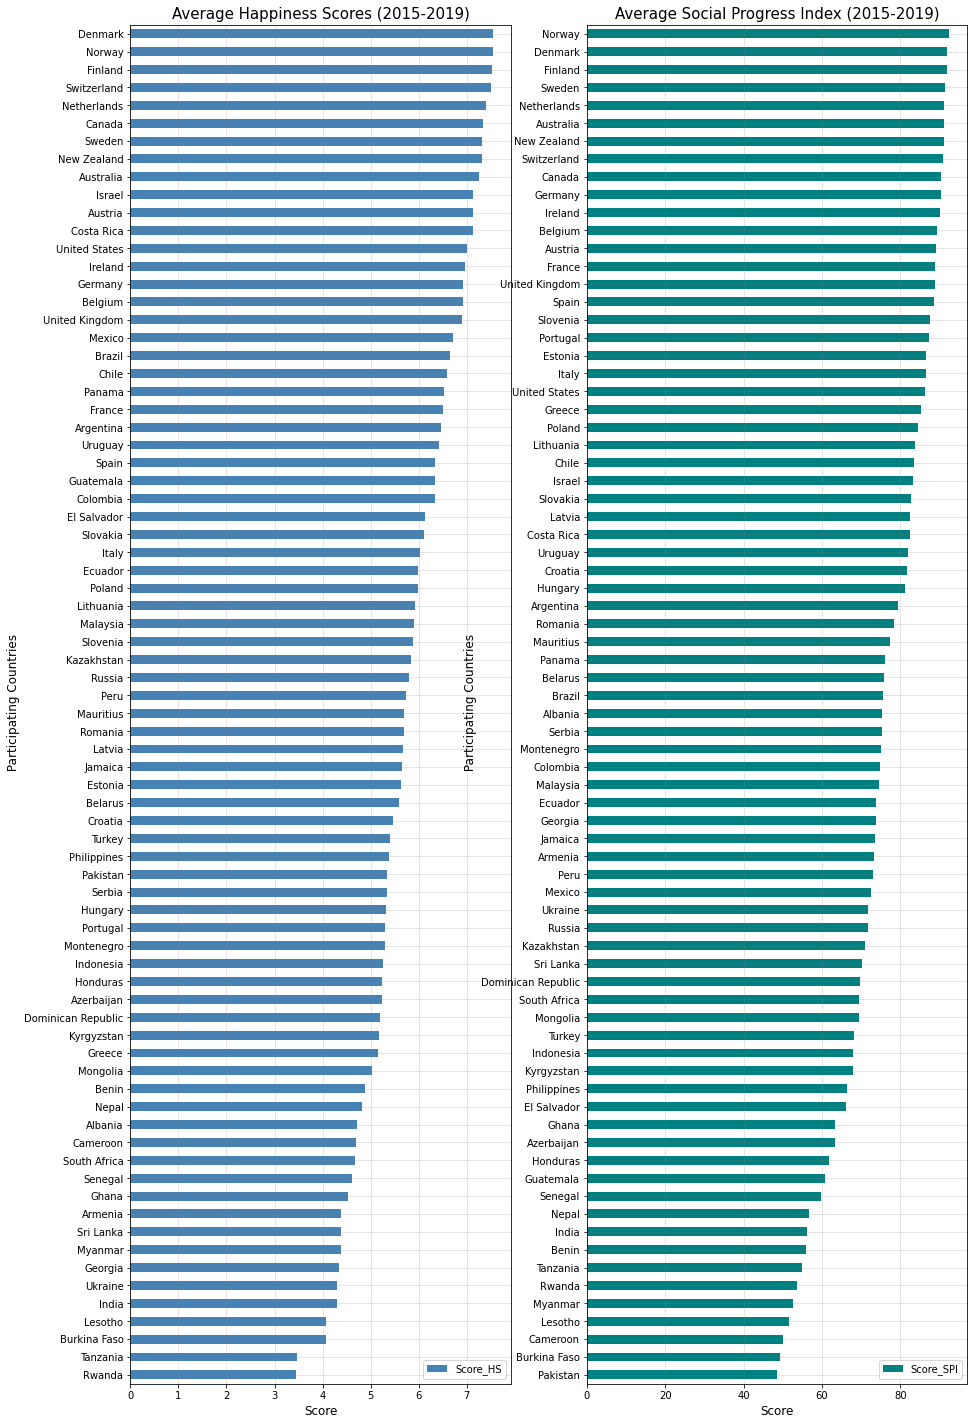

In [6]:
#Charting average of each country of countries
scores_df = totals_df[["Country", "Score_HS", "Score_SPI"]]

#Group by country
scoresgroup_df = scores_df.groupby("Country")
scores_all = scoresgroup_df.mean()

#Plot Happiness Score
HS_df = totals_df.groupby(["Country"])["Score_HS"].mean().reset_index()
ax = plt.subplot(1,2,1)
HS_plot = HS_df.sort_values(["Score_HS"], ascending=True).plot(kind="barh", y="Score_HS", x="Country", figsize=(15,25), color="steelblue", ax=ax)

plt.title("Average Happiness Scores (2015-2019)", fontsize=15)
plt.ylabel(" Participating Countries", fontsize=12)
plt.xlabel("Score", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#Plot Social Progress Index
SP_df = totals_df.groupby(["Country"])["Score_SPI"].mean().reset_index()
ax = plt.subplot(1,2,2)
SP_plot = SP_df.sort_values(["Score_SPI"], ascending=True).plot(kind="barh", y="Score_SPI", x="Country", figsize=(15,25), color="teal", ax=ax)

plt.title("Average Social Progress Index (2015-2019)", fontsize=15)
plt.ylabel(" Participating Countries", fontsize=12)
plt.xlabel("Score", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#plt.savefig("Data/AverageScores.png")
plt.show()

## Do the two systems correlate?

Add observations and findings...

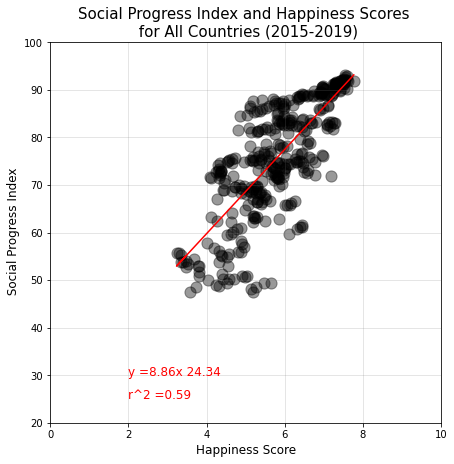

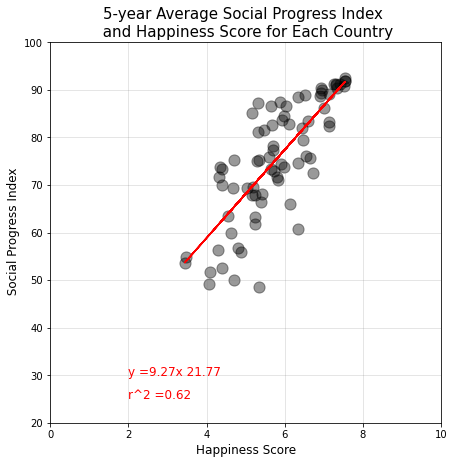

In [7]:
#Scatterplot all years, all countries
x_values = totals_df["Score_HS"]
y_values = totals_df["Score_SPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))
r2_eq = "r^2 =" + str(round(rvalue**2,2))

plt.rcParams["figure.figsize"] = (7,7)
plt.title("Social Progress Index and Happiness Scores \n for All Countries (2015-2019)",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")
plt.annotate(r2_eq, (2,25), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o", alpha=0.4, s=125 )
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_scatter.png")
plt.show()

#Scatterplot averaged scores, all countries
#Group by country
grouped_totals_df = totals_df.groupby(["Country"])
#grouped_totals_df.mean()

#Converting groupby to a dataframe
averages_df = pd.DataFrame(grouped_totals_df["Rank_HS", "Score_HS", "Rank_SPI", "Score_SPI"].mean())

#Scatterplot and annotate averaged data 
x_values = averages_df["Score_HS"]
y_values = averages_df["Score_SPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))
r2_eq = "r^2 =" + str(round(rvalue**2,2))

plt.rcParams["figure.figsize"] = (7,7)
plt.title("5-year Average Social Progress Index \n and Happiness Score for Each Country",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")
plt.annotate(r2_eq, (2,25), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o",  alpha=0.4, s=125)
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_average_scatter")
plt.show()

## Top of the Top 10

Countries that are ranked in the top 10 of BOTH the Happiness Score and the Social Progress Index (2015-2019).

Add observations...

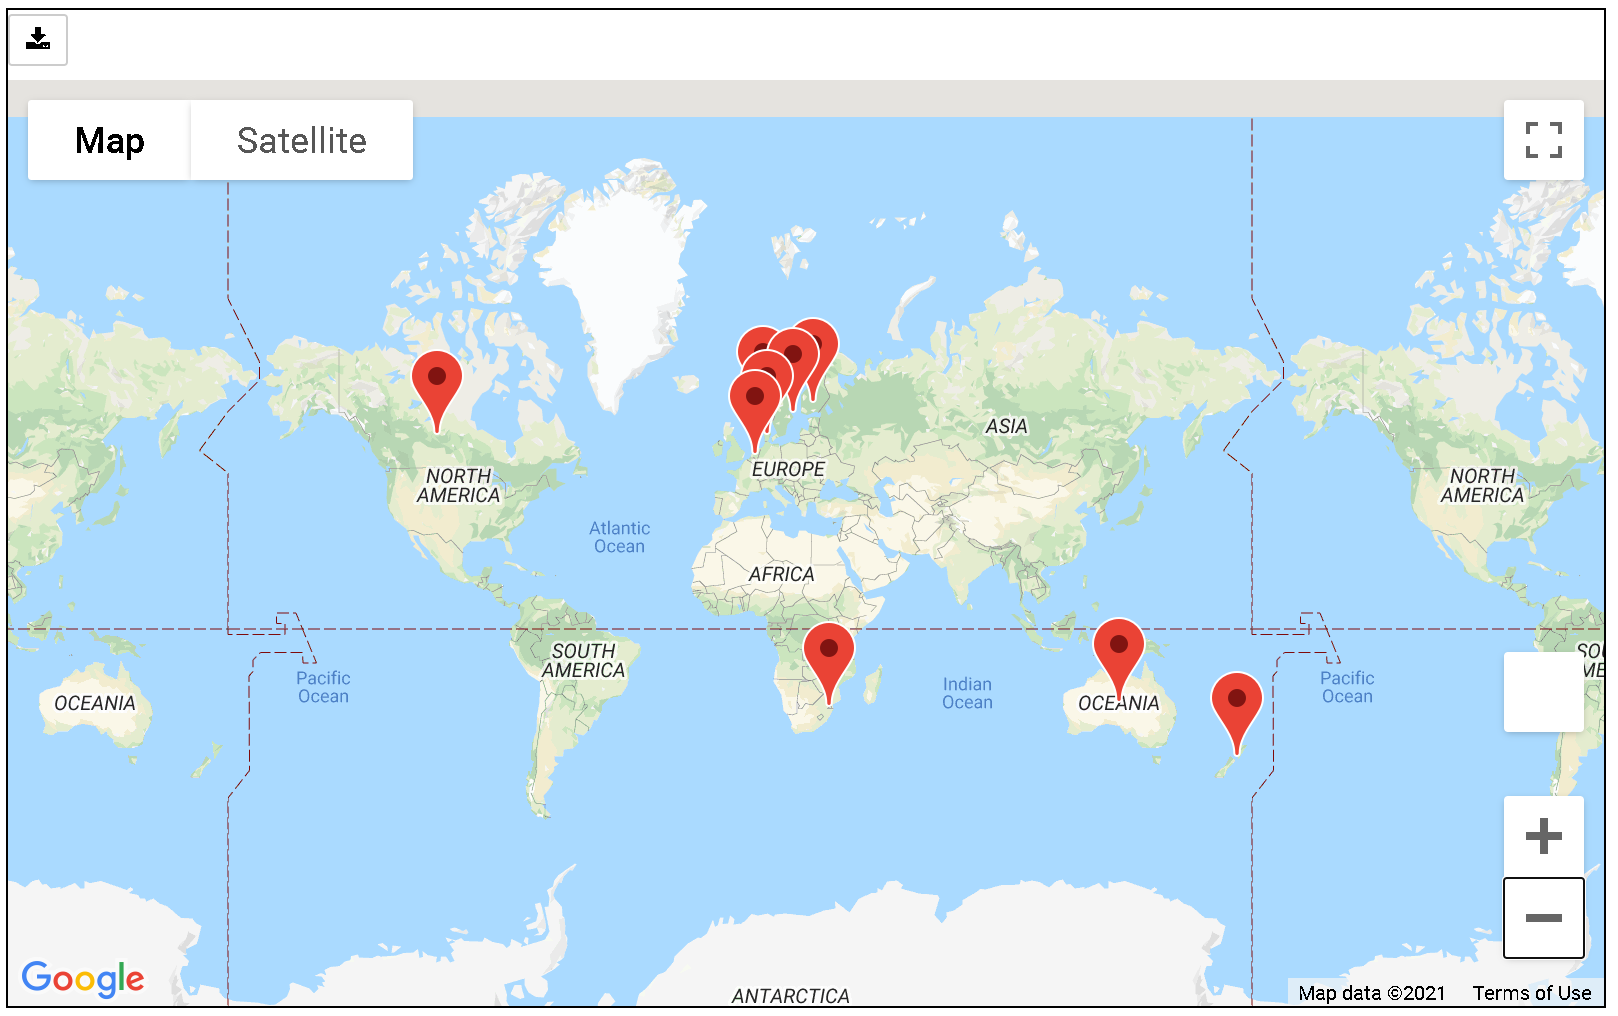

In [10]:
#Rankings of Happiness Score, grouped by year
ranking_HS = totals_df.groupby(["Country","Year"])
#ranking_HS = totals_df.sort_values(["Year","Score_HS"])
#ranking_HS.mean()

In [11]:
ranking_both_top10 = totals_df[(totals_df["Rank_HS"] <= 10) & (totals_df["Rank_SPI"] <= 10)]
#use \ (vertical bar for either condiation)


In [12]:
ranking_HS = ranking_both_top10.sort_values(["Rank_HS"])
ranking_SPI = ranking_both_top10.sort_values(["Rank_SPI"])
ranking_country = ranking_both_top10.sort_values(["Country"])
ranking_top10 = ranking_both_top10.groupby(["Country","Rank_HS","Rank_SPI"])
count10 = ranking_top10["Rank_SPI"].count()

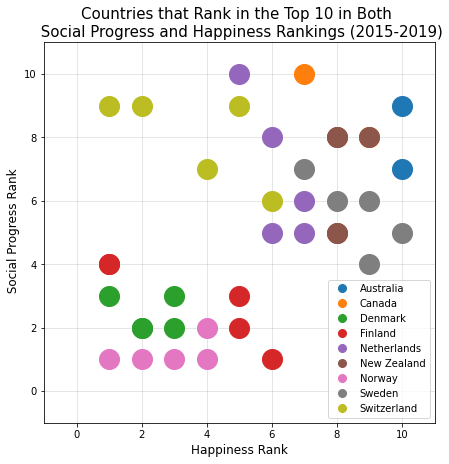

In [13]:
groups = ranking_country.groupby("Country")
colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}

for name, group in groups:
    plt.plot(group["Rank_HS"], group["Rank_SPI"], marker="o", markersize=20, linestyle="", label=name,)

plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["legend.markerscale"] = 0.4

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.legend()

#plt.savefig("Data/TopTenRanking-alternate.png")
plt.show()

This plot did not represent all the information wanted. It was done again using a different method which allowed customization of the colors of the dots (coldest climate is blue --> hotest climate is red), and the size of the dots to represent the best of the two rankings combined (ie: lower the sum of the two scores, the bigger the dot). Unfortunately, there was a problem in getting the legend to display correctly. Visually, this is the preferred plot.

In [18]:
#Create variable for list of ranking data
plot_HS_rank = ranking_country["Rank_HS"].to_list()

plot_SPI_rank = ranking_country["Rank_SPI"].to_list()

country = ranking_country["Country"].to_list()

#Create variable to add and inverse the rankings so the smallest number for the ranking displays a larger dot using list comprehension.
#https://www.geeksforgeeks.org/python-adding-two-list-elements/
#display_dot = [plot_HS_rank[i] + plot_SPI_rank[i] for i in range(len(plot_HS_rank))]

display_dot = [float(plot_HS_rank[i]) + float(plot_SPI_rank[i]) for i in range(len(plot_HS_rank))]

#Find reciprocal
#https://www.geeksforgeeks.org/numpy-reciprocal
display_dot_inv = np.reciprocal(display_dot)

#display_dot
#display_dot_inv

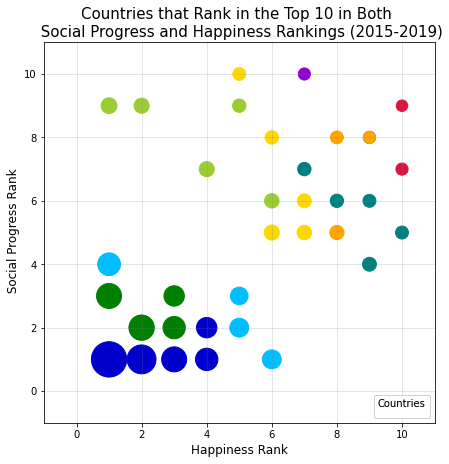

In [19]:
#Scatterplot of the two rankings with cities that rank 1-10 in both.
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
#https://python-graph-gallery.com/270-basic-bubble-plot/
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
    
df = pd.DataFrame(dict(plot_HS_rank=plot_HS_rank, plot_SPI_rank=plot_SPI_rank, country=country, display_dot_inv=display_dot_inv))
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7,7)

colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}
scatter = ax.scatter(df['plot_HS_rank'], df['plot_SPI_rank'], s=df['display_dot_inv']*2500, c=df['country'].apply(lambda x: colors[x]))

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Countries")
ax.add_artist(legend1)

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#plt.savefig("Data/TopTenRanking.png")
plt.show()

# Analysis of Relationships between Social Progress Indicators and Happiness Score

### Basic Human Needs vs. Happiness Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Basic Human Needs_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

# Labels
plt.title('Basic Human Needs vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Basic Human Needs Score')
plt.grid()
plt.show()

In [ ]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

### Foundations of Wellbeing vs Happiness Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Foundations of Wellbeing_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,51),fontsize=15,color="red")

# Labels
plt.title('Foundations of Wellbeing  vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [ ]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

### Opportunity vs. Happiness Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Opportunity_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.7,40),fontsize=15,color="red")

# Labels
plt.title('Opportunity  vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [ ]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

# Finding Sub-metric with Strongest Correlation to Happiness Score

In [ ]:
# Create lists for storage of information
sub_metric_list = []
rvalue_list = []

# Select only columns relating to Social Progress Indicators
submetric_df = project_df.iloc[:, 22:84]

# Iterate through the submetric data frame and store rvalues and submetric label for each
for column in submetric_df:
    submetric_string = column[:-3]
    x_values = project_df['Score_HS']
    y_values = project_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    sub_metric_list.append(submetric_string)
    rvalue_list.append(rvalue)
    
# Store lists in a dictionary
submetric_results_dict = {
    'Sub Metric' : sub_metric_list,
    'R Value' : rvalue_list
}

# Create a dataframe with the dictionary
submetric_results_df = pd.DataFrame(data = submetric_results_dict)

### Positive Relationship Results

In [ ]:
positive_results_df = submetric_results_df.loc[submetric_results_df['R Value'] >= 0]
weak_pos_results_df = positive_results_df.sort_values(by=['R Value'])
strong_pos_results_df = positive_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Positive Indicators of Happiness</b>

In [ ]:
strong_pos_results_df.head()

<b>Weakest Positive Indicators of Happiness</b>

In [ ]:
weak_pos_results_df.head()

### Negative Relationship Results

In [ ]:
negative_results_df = submetric_results_df.loc[submetric_results_df['R Value'] < 0]
strong_neg_results_df = negative_results_df.sort_values(by=['R Value'])
weak_neg_results_df = negative_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Negative Indicators of Happiness</b>

In [ ]:
strong_neg_results_df.head()

<b>Weakest Negative Indicators of Happiness</b>

In [ ]:
weak_neg_results_df.head()

# Analysis of Relationships between Happiness Indicators and Social Progress Score

In [ ]:
# Add the linear regression equation and line to plot
x_values = project_df['Social Progress Index_SP']
y_values = project_df['GDP per capita_HS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60, .3),fontsize=15,color="red")

# Labels
plt.title('GDP per Capita vs. Social Progress Index Score')
plt.xlabel('Social Progress Index Score')
plt.ylabel('GDP per Capita')
plt.grid()
plt.show()

In [ ]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

# Population Density vs Social Progress & Happiness Score

In [ ]:
den_file = "Data/population_density.csv"

# Read our Social Progress data into pandas
density_df = pd.read_csv(den_file, encoding = "ISO-8859-1")
density_df

In [ ]:
country_df = density_df.loc[density_df['Type'] == 'Country/Area']
rename_country = country_df.rename(columns={'Region, subregion, country or area *':'Country'})

In [ ]:
clean_country = rename_country[['Country','2015', '2016', '2017', '2018', '2019']]
clean_country['Country'] = clean_country['Country'].replace({'United States of America':'United States'})
clean_country['Country'] = clean_country['Country'].replace({'United Republic of Tanzania':'Tanzania'})
clean_country['Country'] = clean_country['Country'].replace({'Russian Federation':'Russia'})
density_2015 = clean_country[['Country', '2015']]
density_2016 = clean_country[['Country', '2016']]
density_2017 = clean_country[['Country', '2017']]
density_2018 = clean_country[['Country', '2018']]
density_2019 = clean_country[['Country', '2019']]
density_2019['Country']

In [ ]:
density_2015 = density_2015.rename(columns={'2015':'Population Density'})
density_2016 = density_2016.rename(columns={'2016':'Population Density'})
density_2017 = density_2017.rename(columns={'2017':'Population Density'})
density_2018 = density_2018.rename(columns={'2018':'Population Density'})
density_2019 = density_2019.rename(columns={'2019':'Population Density'})
density_2019.loc[density_2019['Country'] == 'Russia']

In [ ]:
density_2015['Country & Year'] = ('2015')+density_2015['Country']
density_2016['Country & Year'] = ('2016')+density_2016['Country']
density_2017['Country & Year'] = ('2017')+density_2017['Country']
density_2018['Country & Year'] = ('2018')+density_2018['Country']
density_2019['Country & Year'] = ('2019')+density_2019['Country']
density_2015.loc[(density_2015['Country'] == 'Finland') | 
                 (density_2015['Country'] == 'Denmark') |
                 (density_2015['Country'] == 'Norway')  |
                 (density_2015['Country'] == 'Iceland')]

In [ ]:
v1 = density_2015.append(density_2016)

In [ ]:
v2 = v1.append(density_2017)

In [ ]:
v3 = v2.append(density_2018)

In [ ]:
v4 = v3.append(density_2019)

In [ ]:
v4

In [ ]:
new_merge = project_df
new_merge['Country & Year'] = new_merge["Year_HS"].astype(str) + new_merge["Country or region_HS"]

In [ ]:
combined_merge = pd.merge(v4, new_merge, on="Country & Year", how='right')
combined_merge

In [ ]:
pop_den = combined_merge['Population Density'].astype('float64')
hap_score = combined_merge['Score_HS'].astype('float64')
sp_index = combined_merge['Social Progress Index_SP'].astype('float64')

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, hap_score)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, hap_score, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(150,4.5),fontsize=15,color="red")
plt.title("Population Density Vs Happiness Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Happiness Score")
print(f" The R Value is:{rvalue}")
plt.show()

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, sp_index)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, sp_index, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(300,60),fontsize=15,color="red")
plt.title("Population Density Vs Social Progress Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Social Progress Score")
print(f" The R Value is:{rvalue}")
plt.show()